In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/augustincablant/Desktop/Time Series project/data.csv", sep = ';')
df

,Libellé,"Indice CVS-CJO de la production industrielle (base 2021) - Travail du bois et fabrication d'articles en bois et en liège, à l'exception des meubles, fabrication d'articles en vannerie et sparterie (NAF rév. 2, niveau division, poste 16)",Codes
0,idBank,010767746,NaN
1,Dernière mise à jour,05/04/2024 08:45,NaN
2,Période,NaN,NaN
3,2024-02,89.35,A
4,2024-01,88.16,A
...,...,...,...
408,1990-05,140.66,A
409,1990-04,135.77,A
410,1990-03,141.99,A
411,1990-02,144.73,A


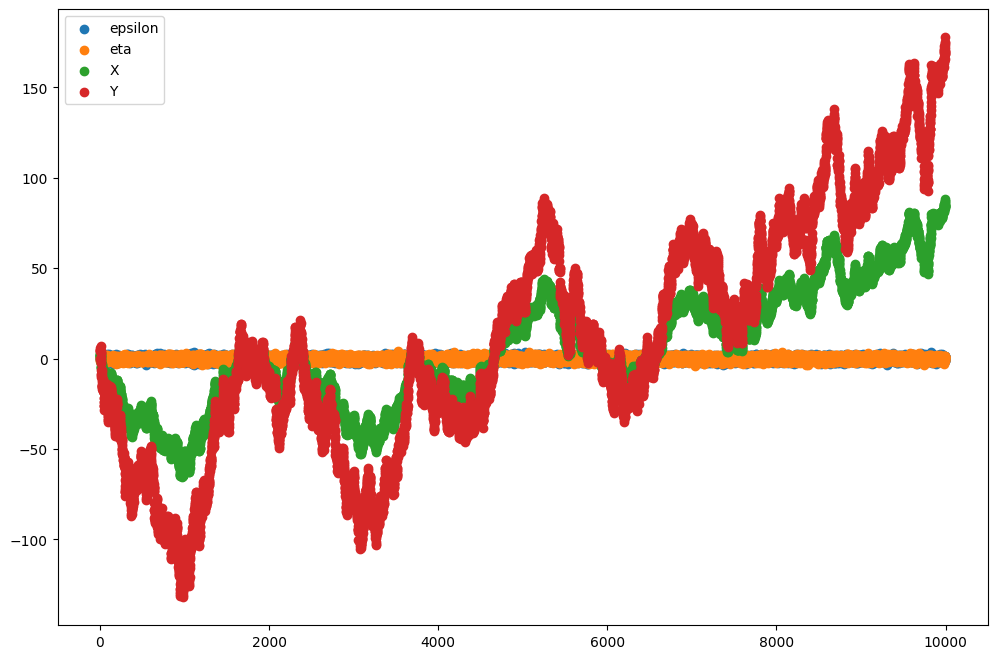

In [5]:
T = 10**4
epsilon, eta = np.random.normal(0,1, T), np.random.normal(0,1, T)
X = np.cumsum(epsilon)
Y = 2 * X + eta 

plt.figure(figsize=(12,8))
plt.scatter(list(range(T)), epsilon, label = "epsilon")
plt.scatter(list(range(T)), eta, label = "eta")
plt.scatter(list(range(T)), X, label = "X")
plt.scatter(list(range(T)), Y, label = "Y")
plt.legend()
plt.show()